In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.linear_model as LM
import category_encoders as ce
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score, train_test_split

In [10]:
data = pd.read_csv('data/output_bs.csv')
data['球団'] = 'bs'

In [15]:
data

,No.,選手名,守備,生年月日,年齢,年数,身長,体重,血液型,投打,出身地,年俸(推定),球団
0,0,勝俣 翔貴,内野手,1997/07/20,22歳,1,178,84,B型,右左,神奈川,800,bs
1,0,西浦 颯大,外野手,1999/05/21,20歳,3,178,70,A型,右左,熊本,1350,bs
2,1,モヤ,外野手,1991/08/09,28歳,3,201,117,不明,右左,プエルトリコ,6500,bs
3,1,佐藤 一磨,投手,2001/04/16,18歳,1,189,89,AB型,左左,神奈川,240,bs
4,2,谷岡 楓太,投手,2001/08/29,18歳,1,176,82,O型,右右,広島,240,bs
...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,99,ソト,内野手,1989/02/28,31歳,3,185,97,不明,右右,プエルトリコ,18500,yb
68,100,宮城 滝太,投手,2000/07/15,19歳,2,181,73,A型,右右,沖縄,375,yb
69,107,コルデロ,投手,1997/12/18,22歳,2,189,88,不明,左左,ドミニカ共和国,240,yb
70,108,デラロサ,内野手,1996/01/24,24歳,1,188,92,不明,右両,ドミニカ共和国,240,yb


In [12]:
team_list = ['c','d','e','f','g','h','l','m','s','t','yb']

In [13]:
for team in team_list:
    concat_data = pd.read_csv('data/output_' + str(team) + '.csv')
    concat_data['球団'] = str(team)
    data = pd.concat([data,concat_data])

In [14]:
data

,No.,選手名,守備,生年月日,年齢,年数,身長,体重,血液型,投打,出身地,年俸(推定),球団
0,0,勝俣 翔貴,内野手,1997/07/20,22歳,1,178,84,B型,右左,神奈川,800,bs
1,0,西浦 颯大,外野手,1999/05/21,20歳,3,178,70,A型,右左,熊本,1350,bs
2,1,モヤ,外野手,1991/08/09,28歳,3,201,117,不明,右左,プエルトリコ,6500,bs
3,1,佐藤 一磨,投手,2001/04/16,18歳,1,189,89,AB型,左左,神奈川,240,bs
4,2,谷岡 楓太,投手,2001/08/29,18歳,1,176,82,O型,右右,広島,240,bs
...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,99,ソト,内野手,1989/02/28,31歳,3,185,97,不明,右右,プエルトリコ,18500,yb
68,100,宮城 滝太,投手,2000/07/15,19歳,2,181,73,A型,右右,沖縄,375,yb
69,107,コルデロ,投手,1997/12/18,22歳,2,189,88,不明,左左,ドミニカ共和国,240,yb
70,108,デラロサ,内野手,1996/01/24,24歳,1,188,92,不明,右両,ドミニカ共和国,240,yb


In [16]:
data['年齢'] = data['年齢'].str.replace('歳','')

In [20]:
data['年齢'] = data['年齢'].astype(int)

In [22]:
data.dtypes

No.        int64
選手名       object
守備        object
生年月日      object
年齢         int32
年数         int64
身長         int64
体重         int64
血液型       object
投打        object
出身地       object
年俸(推定)     int64
球団        object
dtype: object

In [24]:
data['血液型'].unique()

array(['B型', 'A型', '不明', 'AB型', 'O型'], dtype=object)

In [25]:
data['守備'].unique()

array(['内野手', '外野手', '投手', '捕手'], dtype=object)

In [26]:
data['投打'].unique()

array(['右左', '左左', '右右', '左右', '右両', '左両'], dtype=object)

In [ ]:
data.to_csv('NPBProfileData.csv',index=True)

In [40]:
data = pd.read_csv('NPBProfileData.csv')

In [41]:
data.head()

,Unnamed: 0,No.,選手名,守備,生年月日,年齢,年数,身長,体重,血液型,投打,出身地,年俸(推定),球団
0,0,0,勝俣 翔貴,内野手,1997/07/20,22,1,178,84,B型,右左,神奈川,800,bs
1,1,0,西浦 颯大,外野手,1999/05/21,20,3,178,70,A型,右左,熊本,1350,bs
2,2,1,モヤ,外野手,1991/08/09,28,3,201,117,不明,右左,プエルトリコ,6500,bs
3,3,1,佐藤 一磨,投手,2001/04/16,18,1,189,89,AB型,左左,神奈川,240,bs
4,4,2,谷岡 楓太,投手,2001/08/29,18,1,176,82,O型,右右,広島,240,bs


In [5]:
data = data.drop(['Unnamed: 0','No.'],axis=1)

In [6]:
y_train = data['年俸(推定)']
x_train = data.drop(['年俸(推定)'],axis=1)

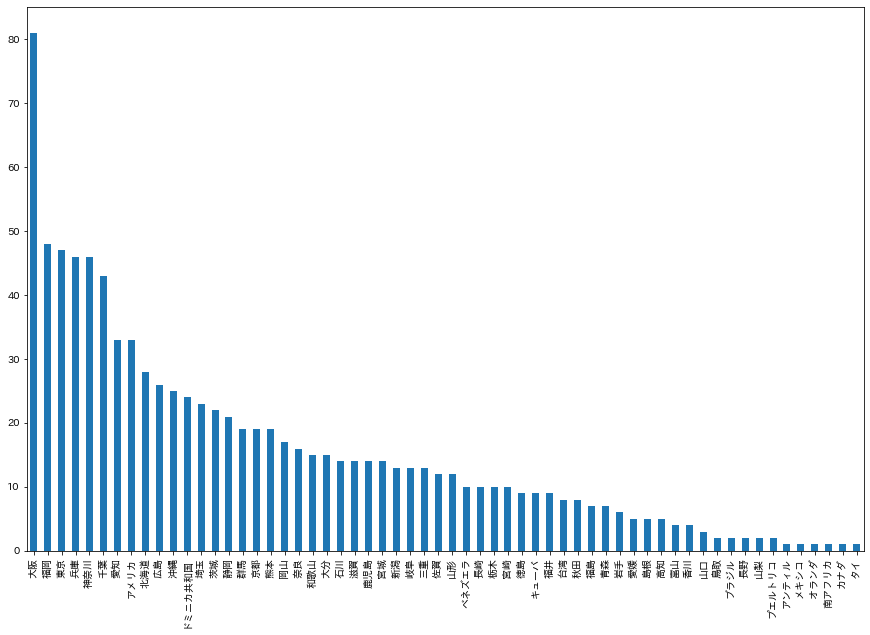

In [7]:
data['出身地'].value_counts().plot(kind='bar',figsize=(15,10))

In [8]:
data['出身地'].value_counts().values

array([81, 48, 47, 46, 46, 43, 33, 33, 28, 26, 25, 24, 23, 22, 21, 19, 19,
       19, 17, 16, 15, 15, 14, 14, 14, 14, 13, 13, 13, 12, 12, 10, 10, 10,
       10,  9,  9,  9,  8,  8,  7,  7,  6,  5,  5,  5,  4,  4,  3,  2,  2,
        2,  2,  2,  1,  1,  1,  1,  1,  1], dtype=int64)

In [9]:
#カウントエンコーディング
import collections

counter = collections.Counter(data['出身地'].values)
count_dict = dict(counter.most_common())
encoded = data['出身地'].map(lambda x: count_dict[x]).values

In [10]:
x_train['出身地'] = encoded

In [11]:
#Label_encoding
col = ['守備','血液型','投打','球団']
ce_ohe = ce.OneHotEncoder(cols=col,handle_unknown='impute',use_cat_names=True)

In [12]:
df_session_ce_onehot = ce_ohe.fit_transform(x_train)

In [13]:
df_session_ce_onehot.head()

,選手名,守備_内野手,守備_外野手,守備_投手,守備_捕手,生年月日,年齢,年数,身長,体重,...,球団_d,球団_e,球団_f,球団_g,球団_h,球団_l,球団_m,球団_s,球団_t,球団_yb
0,勝俣 翔貴,1,0,0,0,1997/07/20,22,1,178,84,...,0,0,0,0,0,0,0,0,0,0
1,西浦 颯大,0,1,0,0,1999/05/21,20,3,178,70,...,0,0,0,0,0,0,0,0,0,0
2,モヤ,0,1,0,0,1991/08/09,28,3,201,117,...,0,0,0,0,0,0,0,0,0,0
3,佐藤 一磨,0,0,1,0,2001/04/16,18,1,189,89,...,0,0,0,0,0,0,0,0,0,0
4,谷岡 楓太,0,0,1,0,2001/08/29,18,1,176,82,...,0,0,0,0,0,0,0,0,0,0


In [14]:
data = df_session_ce_onehot.drop('生年月日',axis=1)

In [15]:
data = data.set_index('選手名')

In [16]:
data.columns

Index(['守備_内野手', '守備_外野手', '守備_投手', '守備_捕手', '年齢', '年数', '身長', '体重', '血液型_B型',
       '血液型_A型', '血液型_不明', '血液型_AB型', '血液型_O型', '投打_右左', '投打_左左', '投打_右右',
       '投打_左右', '投打_右両', '投打_左両', '出身地', '球団_bs', '球団_c', '球団_d', '球団_e',
       '球団_f', '球団_g', '球団_h', '球団_l', '球団_m', '球団_s', '球団_t', '球団_yb'],
      dtype='object')

In [17]:
data.columns

Index(['守備_内野手', '守備_外野手', '守備_投手', '守備_捕手', '年齢', '年数', '身長', '体重', '血液型_B型',
       '血液型_A型', '血液型_不明', '血液型_AB型', '血液型_O型', '投打_右左', '投打_左左', '投打_右右',
       '投打_左右', '投打_右両', '投打_左両', '出身地', '球団_bs', '球団_c', '球団_d', '球団_e',
       '球団_f', '球団_g', '球団_h', '球団_l', '球団_m', '球団_s', '球団_t', '球団_yb'],
      dtype='object')

In [18]:
y_train = y_train.values

In [19]:
data.columns

Index(['守備_内野手', '守備_外野手', '守備_投手', '守備_捕手', '年齢', '年数', '身長', '体重', '血液型_B型',
       '血液型_A型', '血液型_不明', '血液型_AB型', '血液型_O型', '投打_右左', '投打_左左', '投打_右右',
       '投打_左右', '投打_右両', '投打_左両', '出身地', '球団_bs', '球団_c', '球団_d', '球団_e',
       '球団_f', '球団_g', '球団_h', '球団_l', '球団_m', '球団_s', '球団_t', '球団_yb'],
      dtype='object')

In [20]:
sc=preprocessing.StandardScaler()
sc.fit(data)
x_train = sc.transform(data)

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(data, y_train, train_size = 0.7, test_size = 0.3, random_state = 0)

In [22]:
clf = LM.Ridge(alpha=0.1,fit_intercept=False)

In [23]:
clf.fit(X_train,Y_train)

Ridge(alpha=0.1, copy_X=True, fit_intercept=False, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [24]:
print(f"training dataに対しての精度: {clf.score(X_train, Y_train):.2}")
print(f"test dataに対しての精度: {clf.score(X_test, Y_test):.2}")

training dataに対しての精度: 0.29
test dataに対しての精度: 0.3


In [25]:
y_log_train = np.log(y_train+1)

In [26]:
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(data, y_log_train, train_size = 0.7, test_size = 0.3, random_state = 0)

In [27]:
clf2 = LM.Ridge(alpha=0.1,fit_intercept=False)
clf2.fit(X_train2,Y_train2)

Ridge(alpha=0.1, copy_X=True, fit_intercept=False, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [28]:
print(f"training dataに対しての精度: {clf2.score(X_train2, Y_train2):.2}")
print(f"test dataに対しての精度: {clf2.score(X_test2, Y_test2):.2}")

training dataに対しての精度: 0.5
test dataに対しての精度: 0.49


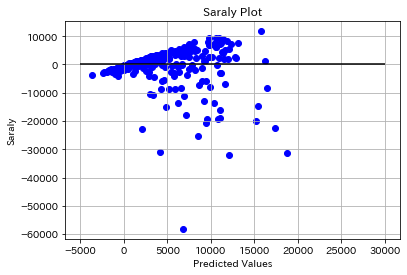

In [29]:
Y_pred = clf.predict(X_test) # 検証データを用いて目的変数を予測

plt.scatter(Y_pred, Y_pred - Y_test, color = 'blue')      # 残差をプロット 
plt.hlines(y = 0, xmin = -5000, xmax = 30000, color = 'black') # x軸に沿った直線をプロット
plt.title('Saraly Plot')                                # 図のタイトル
plt.xlabel('Predicted Values')                            # x軸のラベル
plt.ylabel('Saraly')                                   # y軸のラベル
plt.grid()                                                # グリッド線を表示

plt.show()    

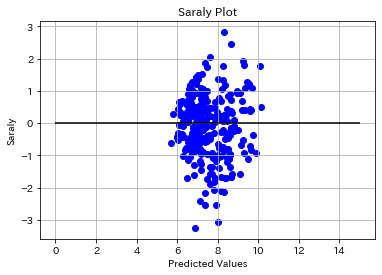

In [30]:
Y_pred2 = clf2.predict(X_test2) # 検証データを用いて目的変数を予測

plt.scatter(Y_pred2, Y_pred2 - Y_test2, color = 'blue')      # 残差をプロット 
plt.hlines(y = 0, xmin = 0, xmax = 15, color = 'black') # x軸に沿った直線をプロット
plt.title('Saraly Plot')                                # 図のタイトル
plt.xlabel('Predicted Values')                            # x軸のラベル
plt.ylabel('Saraly')                                   # y軸のラベル
plt.grid()                                                # グリッド線を表示

plt.show()   

In [31]:
#7 compared with test and train data
Y_ridge_pred=clf.predict(X_test)
print('[Ridgeの平均二乗誤差]')
RMS_ridge=np.mean((Y_ridge_pred-Y_test)**2)
print(RMS_ridge)

[Ridgeの平均二乗誤差]
54420426.25286073


In [32]:
Y_ridge_pred2=clf2.predict(X_test2)
print('[対数変換：Ridgeの平均二乗誤差]')
RMS_ridge2=np.mean((Y_ridge_pred2-Y_test2)**2)
print(RMS_ridge2)

[対数変換：Ridgeの平均二乗誤差]
0.9172813697561865


In [33]:
print('Ridgeでの係数')
print(clf.intercept_)
print(clf.coef_)

Ridgeでの係数
0.0
[ 1.03363835e+03  7.96795355e+02 -1.40492063e+02 -1.80269273e+03
  4.10800280e+02  3.02533281e+02 -1.06450216e+02  1.32717060e+02
 -1.73159091e+03 -6.26543649e+02  3.59349496e+03  1.31871909e+01
 -1.36129868e+03  7.61582773e+02 -3.73716267e+02  5.08338747e+02
  2.82865597e+03  7.91640892e+02 -4.62925320e+03 -1.83541048e+00
 -6.83774973e+01 -2.30681918e+02 -1.16293964e+03  5.65240783e+01
  5.04574715e+00  2.21267868e+01  2.82713801e+03 -3.10086506e+02
 -1.07516188e+03 -6.81761975e+01  1.63614520e+02 -2.71776594e+02]


In [34]:
print('Ridgeでの係数')
print(clf2.intercept_)
print(clf2.coef_)

Ridgeでの係数
0.0
[ 1.57006001e+00  1.47426480e+00  1.53412269e+00  1.16281296e+00
  1.30285282e-01  4.38498893e-02 -8.85754847e-03  1.66516187e-02
  8.85364836e-01  1.06308421e+00  1.69421445e+00  1.07118116e+00
  1.02741580e+00  1.01829549e+00  8.76098231e-01  9.92273475e-01
  1.36058295e+00  1.29588440e+00  1.98125911e-01 -2.72403475e-04
  5.06024408e-01  5.01955910e-01  4.06933570e-01  2.71941561e-01
  6.05190803e-01  3.01205672e-01  6.97639366e-01  3.98671884e-01
  3.63562623e-01  3.97565225e-01  5.63539760e-01  7.27029673e-01]


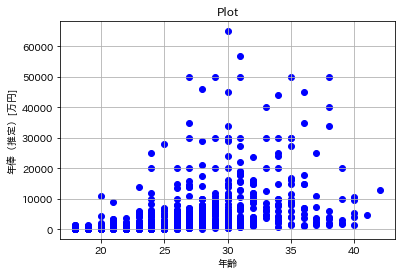

In [35]:
plt.scatter(data['年齢'], y_train, color = 'blue')         # 説明変数と目的変数のデータ点の散布図をプロット
# plt.plot(data['年齢'], clf.predict(), color = 'red') # 回帰直線をプロット

plt.title('Plot')               # 図のタイトル
plt.xlabel('年齢') # x軸のラベル
plt.ylabel('年俸（推定）[万円]')    # y軸のラベル
plt.grid()                                 # グリッド線を表示
plt.show() 

In [36]:
saraly = list(data['年齢'].values)

In [37]:
import itertools
import math
def combinations_counts(n,r):
    return math.factorial(n) // (math.factorial(n-r) * math.factorial(r))

comb = itertools.combinations(l,4)
count = 1
for v in itertools.combinations(l,4):
    print(count,v)
    count+=1

NameError: name 'l' is not defined

In [204]:
data.to_csv('onehot_mungged_data.csv')

In [210]:
data = data.drop('推定年俸',axis=1)

In [211]:
data.head()

,守備_内野手,守備_外野手,守備_投手,守備_捕手,年齢,年数,身長,体重,血液型_B型,血液型_A型,...,球団_d,球団_e,球団_f,球団_g,球団_h,球団_l,球団_m,球団_s,球団_t,球団_yb
選手名,,,,,,,,,,,,,,,,,,,,,
勝俣 翔貴,1,0,0,0,22,1,178,84,1,0,...,0,0,0,0,0,0,0,0,0,0
西浦 颯大,0,1,0,0,20,3,178,70,0,1,...,0,0,0,0,0,0,0,0,0,0
モヤ,0,1,0,0,28,3,201,117,0,0,...,0,0,0,0,0,0,0,0,0,0
佐藤 一磨,0,0,1,0,18,1,189,89,0,0,...,0,0,0,0,0,0,0,0,0,0
谷岡 楓太,0,0,1,0,18,1,176,82,0,0,...,0,0,0,0,0,0,0,0,0,0


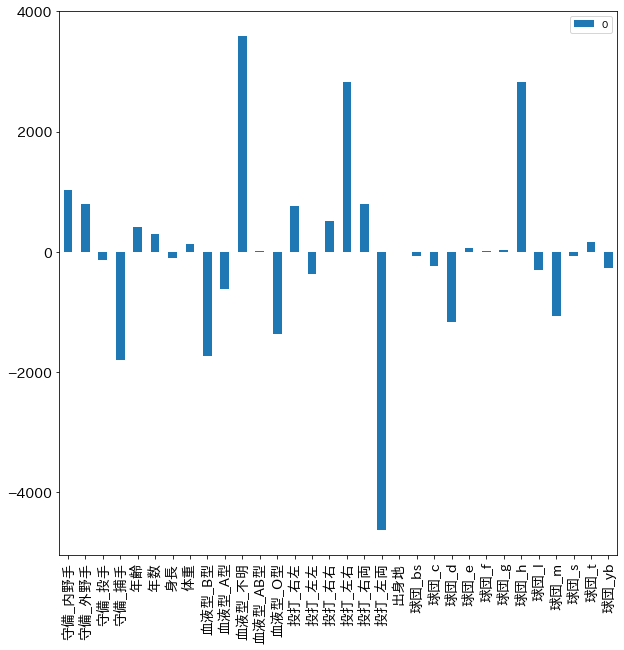

In [243]:
pd.DataFrame(clf.coef_,index=data.columns).plot(kind='bar',figsize = (10,10),fontsize=14)
plt.savefig('saraly_coef.png')

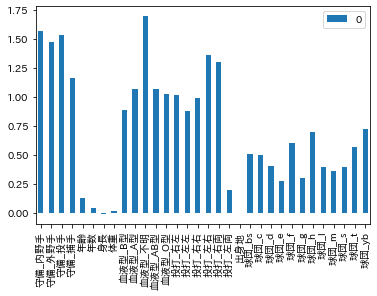

In [236]:
pd.DataFrame(clf2.coef_,index=data.columns).plot(kind='bar')

Text(0.5, 0, '推定年俸[万円]')

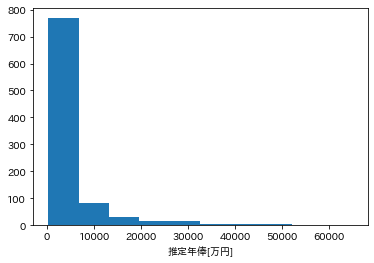

In [228]:
plt.hist(y_train)
plt.xlabel('推定年俸[万円]')

In [246]:
base_data = pd.read_csv('NPBProfileData.csv')

右右    517
右左    239
左左    156
右両     14
左右      3
左両      1
Name: 投打, dtype: int64

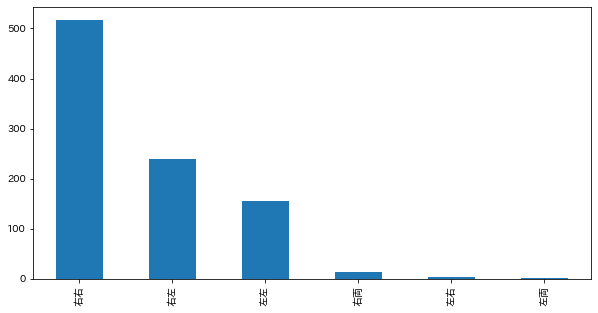

In [251]:
base_data['投打'].value_counts().plot(kind='bar',figsize=(10,5))
base_data['投打'].value_counts()

In [252]:
base_data[base_data['投打']=='左右']

,Unnamed: 0,No.,選手名,守備,生年月日,年齢,年数,身長,体重,血液型,投打,出身地,年俸(推定),球団
33,33,27,アルバース,投手,1985/10/06,34,3,185,91,不明,左右,カナダ,24000,bs
201,47,53,ゴンサレス,投手,1992/01/17,28,1,188,93,不明,左右,ドミニカ共和国,5000,d
216,62,70,ロメロ,投手,1991/01/24,29,2,190,103,不明,左右,ドミニカ共和国,5000,d


In [254]:
base_data = base_data.drop(['Unnamed: 0','No.'],axis=1)

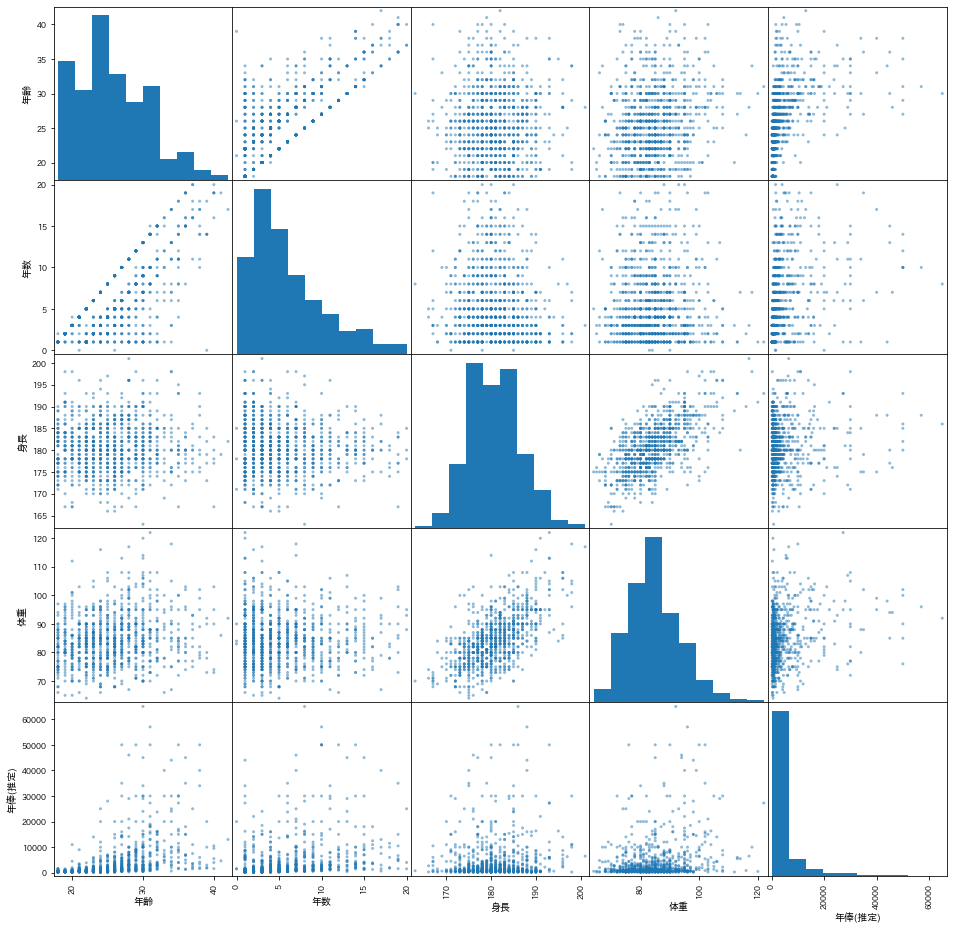

In [256]:
pd.plotting.scatter_matrix(base_data,figsize=(16,16))
plt.show()

A型     315
O型     254
B型     185
不明      89
AB型     87
Name: 血液型, dtype: int64

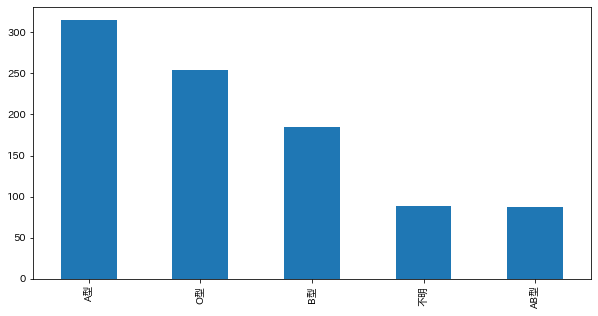

In [257]:
base_data['血液型'].value_counts().plot(kind='bar',figsize=(10,5))
base_data['血液型'].value_counts()

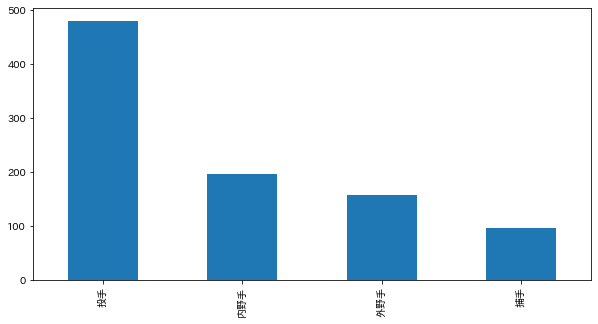

In [290]:
base_data['守備'].value_counts().plot(kind='bar',figsize=(10,5))
base_data['守備'].value_counts()
plt.savefig('position_count.png')

In [259]:
group = base_data.groupby('球団')

In [263]:
mean_data = group.mean().round(1)

In [ ]:
data['推定年俸'] = y_train

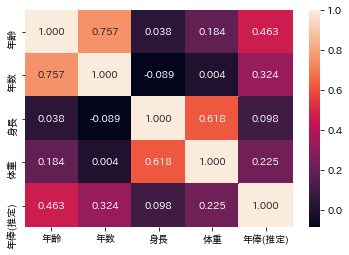

In [291]:
sns.heatmap(base_data.corr(), annot=True, fmt="1.3f")
plt.savefig('corr_st.png')

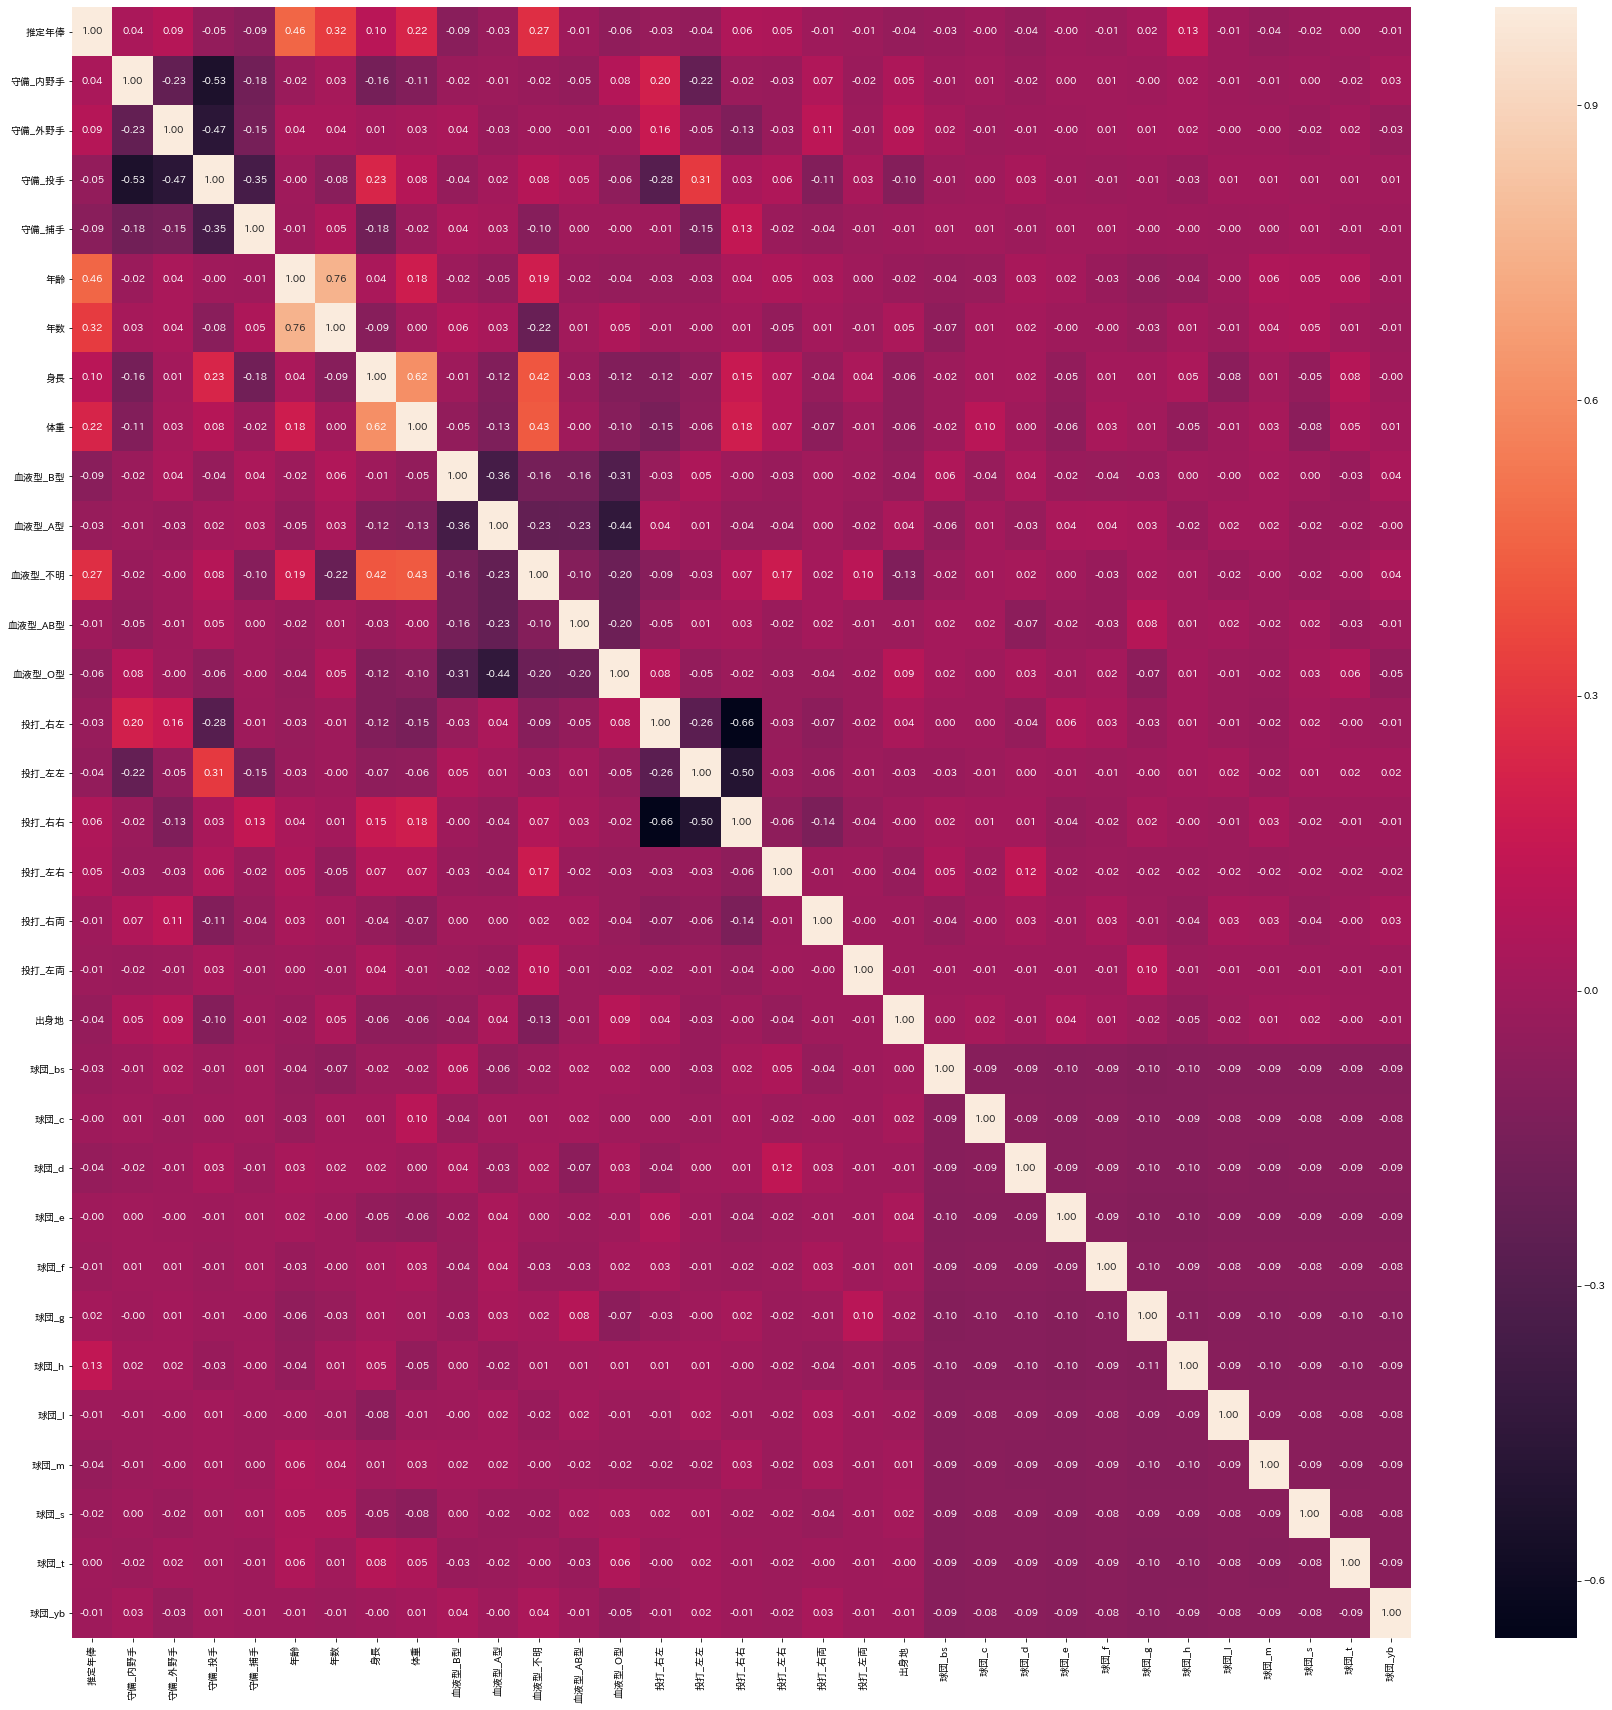

In [288]:
fig, ax = plt.subplots(figsize=(30, 30))
plt.fontsize=14
sns.heatmap(corr_data,annot=True,fmt='1.2f')
plt.savefig('corr_data.png')
plt.show()

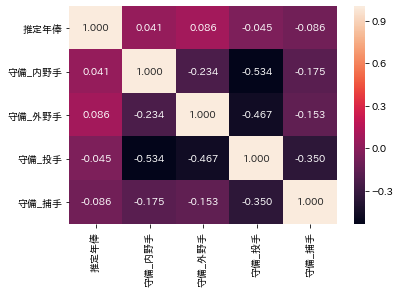

In [292]:
sns.heatmap(data[['推定年俸','守備_内野手', '守備_外野手', '守備_投手', '守備_捕手']].corr(), annot=True, fmt="1.3f")
plt.savefig('corr_posi.png')

In [293]:
data.columns

Index(['守備_内野手', '守備_外野手', '守備_投手', '守備_捕手', '年齢', '年数', '身長', '体重', '血液型_B型',
       '血液型_A型', '血液型_不明', '血液型_AB型', '血液型_O型', '投打_右左', '投打_左左', '投打_右右',
       '投打_左右', '投打_右両', '投打_左両', '出身地', '球団_bs', '球団_c', '球団_d', '球団_e',
       '球団_f', '球団_g', '球団_h', '球団_l', '球団_m', '球団_s', '球団_t', '球団_yb',
       '推定年俸'],
      dtype='object')

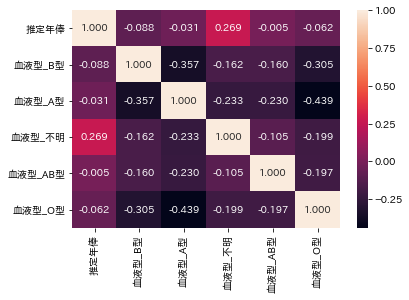

In [294]:
sns.heatmap(data[['推定年俸','血液型_B型','血液型_A型', '血液型_不明', '血液型_AB型', '血液型_O型']].corr(), annot=True, fmt="1.3f")
plt.savefig('corr_blood.png')

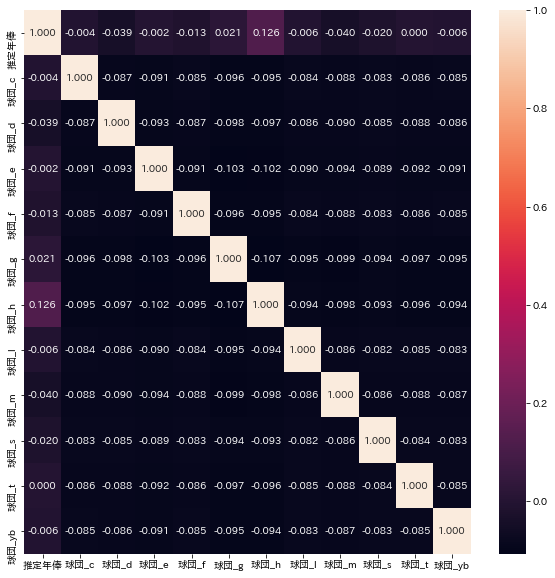

In [298]:
plt.figure(figsize=(10,10))
sns.heatmap(data[['推定年俸','球団_c', '球団_d', '球団_e','球団_f', '球団_g', '球団_h', '球団_l', '球団_m', '球団_s', '球団_t', '球団_yb']].corr(), annot=True, fmt="1.3f")
plt.savefig('corr_team.png')

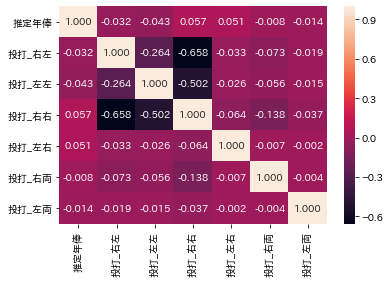

In [297]:
sns.heatmap(data[['推定年俸','投打_右左', '投打_左左', '投打_右右','投打_左右', '投打_右両', '投打_左両']].corr(), annot=True, fmt="1.3f")
plt.savefig('corr_p_b.png')

In [280]:
data.head()

,守備_内野手,守備_外野手,守備_投手,守備_捕手,年齢,年数,身長,体重,血液型_B型,血液型_A型,...,球団_e,球団_f,球団_g,球団_h,球団_l,球団_m,球団_s,球団_t,球団_yb,推定年俸
選手名,,,,,,,,,,,,,,,,,,,,,
勝俣 翔貴,1,0,0,0,22,1,178,84,1,0,...,0,0,0,0,0,0,0,0,0,800
西浦 颯大,0,1,0,0,20,3,178,70,0,1,...,0,0,0,0,0,0,0,0,0,1350
モヤ,0,1,0,0,28,3,201,117,0,0,...,0,0,0,0,0,0,0,0,0,6500
佐藤 一磨,0,0,1,0,18,1,189,89,0,0,...,0,0,0,0,0,0,0,0,0,240
谷岡 楓太,0,0,1,0,18,1,176,82,0,0,...,0,0,0,0,0,0,0,0,0,240


In [310]:
team_summary = base_data.groupby('球団')

In [315]:
team_summary['年俸(推定)'].describe()

,count,mean,std,min,25%,50%,75%,max
球団,,,,,,,,
bs,81.0,3610.000000,6846.094142,240.0,560.0,1400.0,2800.0,44000.0
c,73.0,4246.575342,6651.416927,230.0,650.0,1200.0,4400.0,30000.0
d,76.0,3323.723684,5180.200762,300.0,700.0,1450.0,4200.0,30000.0
e,83.0,4301.686747,7982.849424,230.0,615.0,1250.0,3600.0,50000.0
f,73.0,3989.178082,5578.849631,240.0,700.0,1600.0,5600.0,29000.0
g,91.0,4857.307692,10813.030342,240.0,440.0,1000.0,2900.0,65000.0
h,89.0,7393.820225,13192.812222,270.0,500.0,1200.0,7000.0,57000.0
l,71.0,4192.676056,6574.558531,280.0,635.0,1000.0,4650.0,35000.0
m,77.0,3295.584416,4353.391749,230.0,750.0,1600.0,3500.0,23760.0


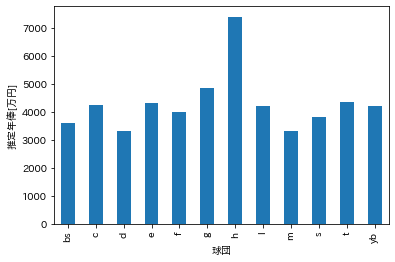

In [321]:
team_summary['年俸(推定)'].mean().plot(kind='bar')
plt.ylabel('推定年俸[万円]')
plt.savefig('saraly_team.png')

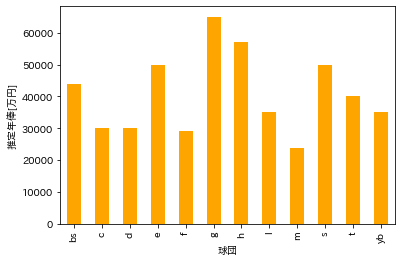

In [322]:
team_summary['年俸(推定)'].max().plot(kind='bar',color='orange')
plt.ylabel('推定年俸[万円]')
plt.savefig('saraly_team2.png')

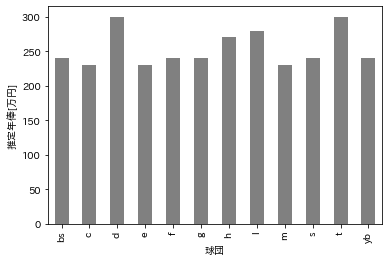

In [323]:
team_summary['年俸(推定)'].min().plot(kind='bar',color='gray')
plt.ylabel('推定年俸[万円]')
plt.savefig('saraly_team3.png')

In [325]:
corr_data.to_csv('corr_data.csv')

In [48]:
data2 = pd.read_csv('data/onehot_mungged_data.csv')

In [49]:
data2.head()

,選手名,守備_内野手,守備_外野手,守備_投手,守備_捕手,年齢,年数,身長,体重,血液型_B型,...,球団_e,球団_f,球団_g,球団_h,球団_l,球団_m,球団_s,球団_t,球団_yb,推定年俸
0,勝俣 翔貴,1,0,0,0,22,1,178,84,1,...,0,0,0,0,0,0,0,0,0,800
1,西浦 颯大,0,1,0,0,20,3,178,70,0,...,0,0,0,0,0,0,0,0,0,1350
2,モヤ,0,1,0,0,28,3,201,117,0,...,0,0,0,0,0,0,0,0,0,6500
3,佐藤 一磨,0,0,1,0,18,1,189,89,0,...,0,0,0,0,0,0,0,0,0,240
4,谷岡 楓太,0,0,1,0,18,1,176,82,0,...,0,0,0,0,0,0,0,0,0,240


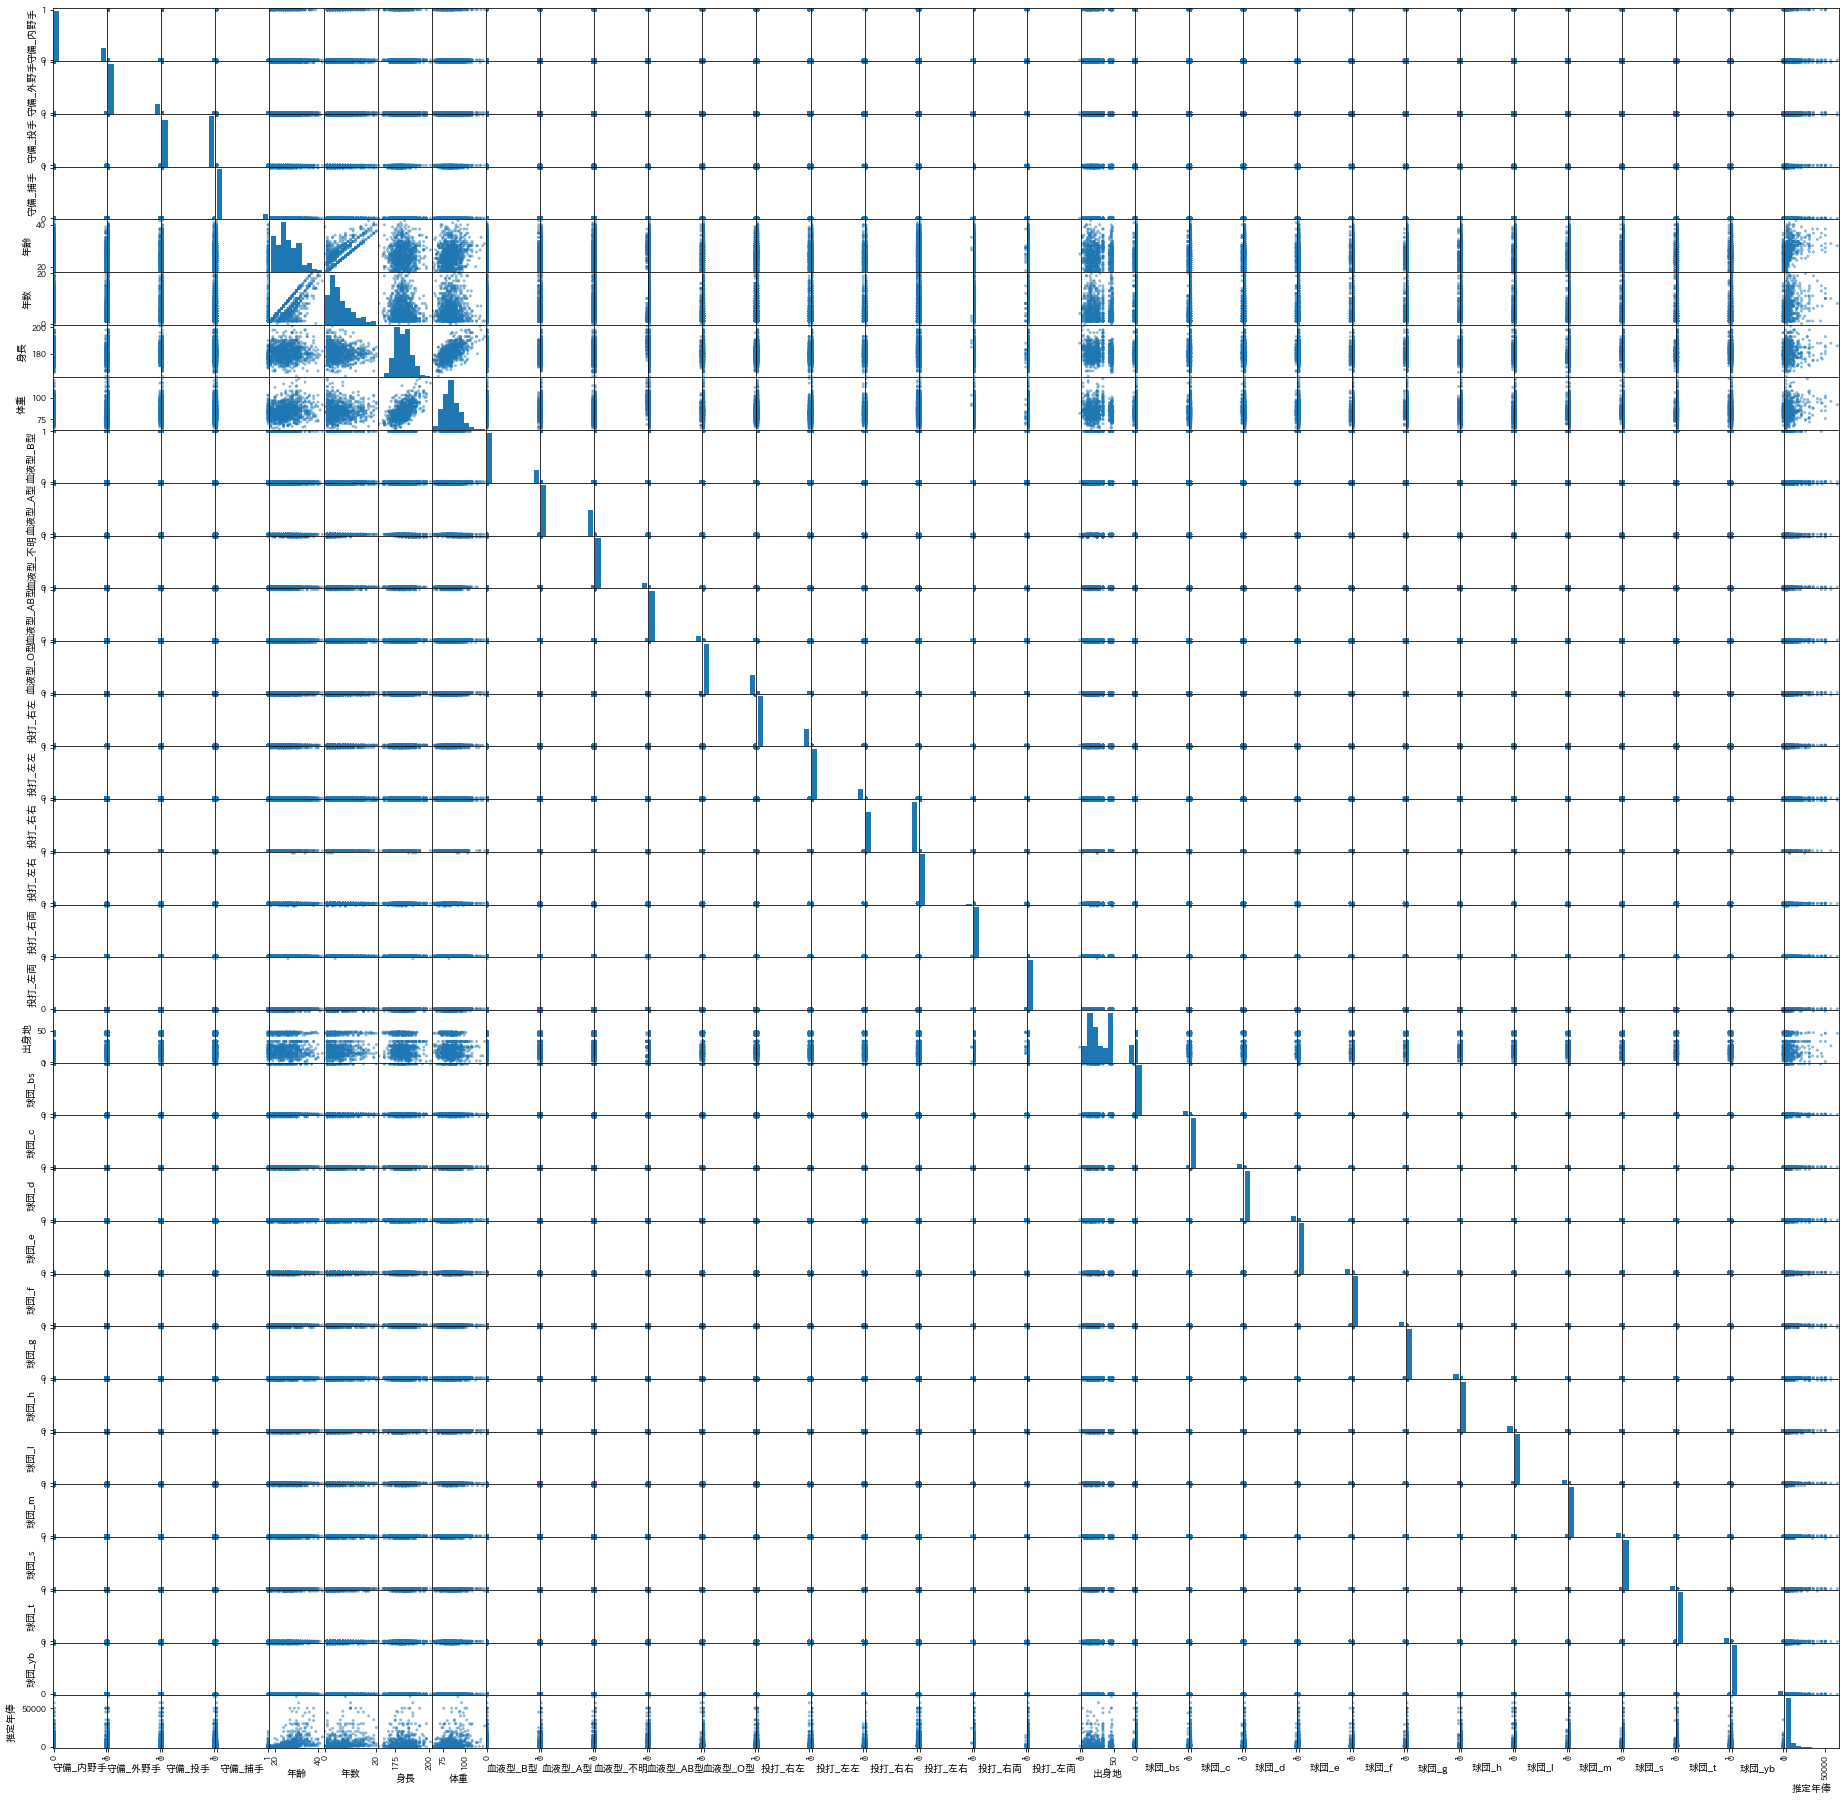

In [51]:
pd.plotting.scatter_matrix(data2,figsize=(32,32))
plt.show()